In [1]:
import pandas as pd
import nltk
tweets=pd.read_csv('data.csv')
tweets.head()


,tweet,sentimentPolarity,Tejas Review
0,@HatePatroller All @mindvalley students are li...,0.000000,Neutral
1,RT @AlphaGammaHQ: Conferences are great platfo...,0.000000,Positive
2,@AlphaGammaHQ @wobi_en @GIFLondon @Esportsbzsu...,1.000008,Positive
3,"RT @mindvalley: You asked, we delivered. ðŸ’œ\...",0.000000,Neutral
4,@dubeji18 Check this one out by @thesleepdocto...,0.000000,Neutral


<AxesSubplot:>

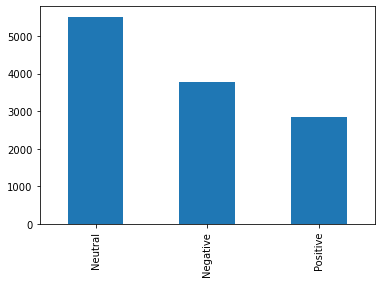

In [34]:
tweets['Tejas Review'].value_counts().plot(kind='bar')

In [2]:
tweets.shape

(12126, 3)



				 Neutral_words


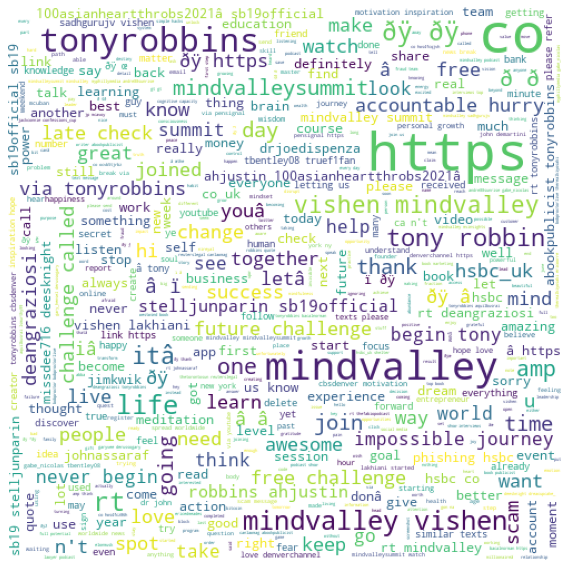

				 Positive_words


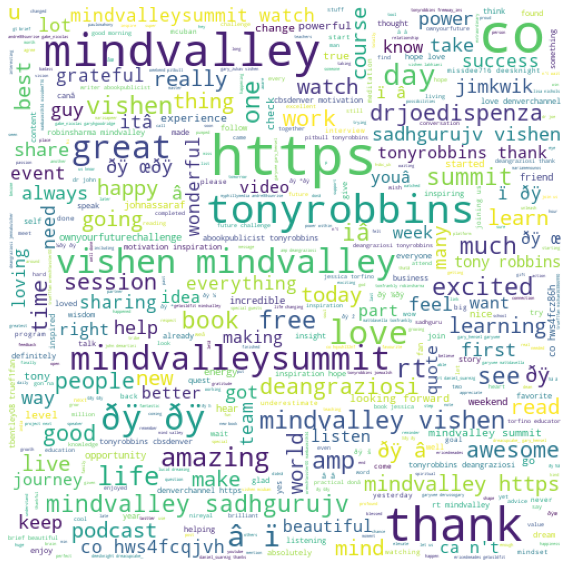

				 Negative_words


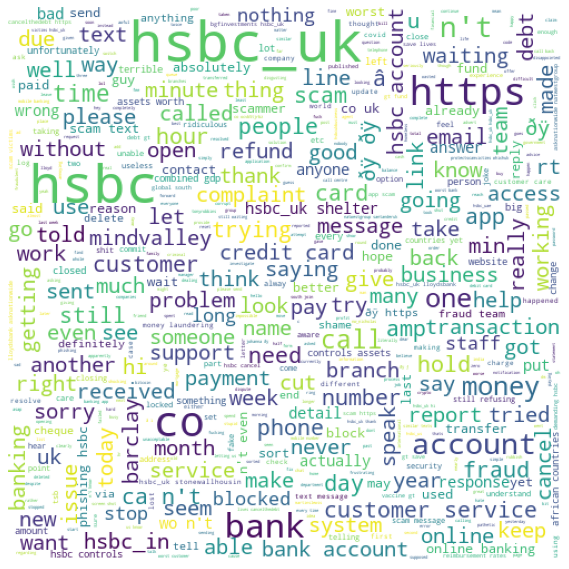

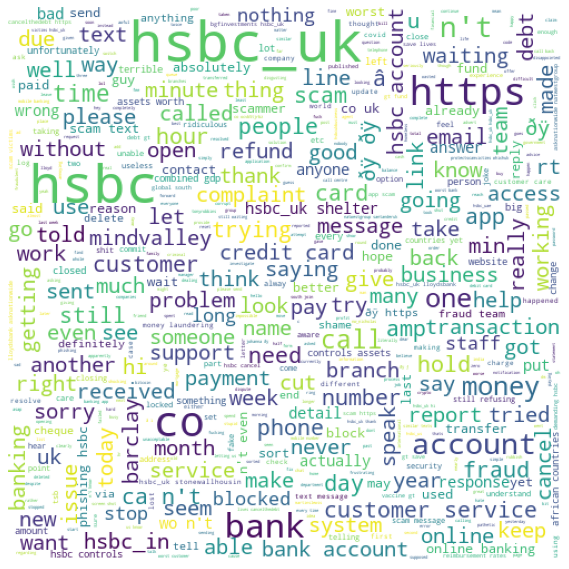

In [42]:
from wordcloud import STOPWORDS 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

unrelated_dataset = tweets[tweets['Tejas Review'] == 'Neutral']
discuss_dataset = tweets[tweets['Tejas Review'] == 'Positive']
agree_dataset = tweets[tweets['Tejas Review'] == 'Negative']


unrelated_words = ' '
discuss_words = ' '
agree_words = ' '



for words in unrelated_dataset.tweet:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        unrelated_words = unrelated_words + word + " "

for words in discuss_dataset.tweet:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        discuss_words = discuss_words + word + " "
        
for words in agree_dataset.tweet:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        agree_words = agree_words + word + " "
        


def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t Neutral_words")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(unrelated_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Positive_words")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(discuss_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Negative_words")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(agree_words)
gen_wordcloud(wordcloud)


gen_wordcloud(wordcloud)

# Data Pre Processing

In [3]:
# tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)
# tweets_df.shape

In [5]:
tweets_df = tweets.copy()

In [6]:
X=tweets_df['tweet']
y=tweets_df['Tejas Review']

# Clean Your Text Data

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chandra.Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()

In [9]:
import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)



In [10]:
cleaned_data

['hatepatrol mindvalley student like',
 'rt alphagammahq confer great platform learn exchang idea meet like mind peopl build partnership',
 'alphagammahq wobi en giflondon esportsbzsummit mindvalley awesom list humbl thank includ us',
 'rt mindvalley ask deliv year ask us make free mindvalley event http co bihqu',
 'dubeji check one thesleepdoctor mindvalley http co fqi cc xrg highli recommend take consider natur chronotyp help master sleep',
 'hey come join valueabl free summit mindvalley teacher share know well activ host teacher wait join http co yyqva qhzx',
 'dubeji thesleepdoctor mindvalley also tri chamomil tea min go bed amaz see immedi benefit',
 'theayushag thesleepdoctor mindvalley look interest thank share ayush appreci',
 'rt sadhgurujv namaskaram vishen wonder speak time rife possibl time redefin amp redesig',
 'vishen mindvalley sadhgurujv great one sadhguru blow mind reconnect us eastern practic knowledg demonis western coloni much shame mockeri eastern valu west much s

In [11]:
y

0         Neutral
1        Positive
2        Positive
3         Neutral
4         Neutral
           ...   
12121    Negative
12122    Negative
12123    Negative
12124    Negative
12125    Negative
Name: Tejas Review, Length: 12126, dtype: object

In [14]:
sentiment_ordering = ['Negative', 'Neutral', 'Positive']

y = y.apply(lambda x: sentiment_ordering.index(x))

In [15]:
y.head()

0    1
1    2
2    2
3    1
4    1
Name: Tejas Review, dtype: int64

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray()
X_fin.shape

(12126, 3000)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
model=MultinomialNB()

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)

In [19]:
model.fit(X_train,y_train)

MultinomialNB()

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1145
           1       0.83      0.64      0.72      1621
           2       0.64      0.79      0.70       872

    accuracy                           0.78      3638
   macro avg       0.77      0.80      0.77      3638
weighted avg       0.79      0.78      0.77      3638



#### Test Preprocessing

In [22]:
test = pd.read_csv("test.csv")
test

,tweet,sentimentPolarity,twitterHandlerused,FastText_o/p,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Ready to travel to cheer on your favorite stud...,0.862894,Barclays,POSITIVE,NaN,NaN,Noel - Fasttext o/p labels generation done for...
1,@AMereCon_ Oh stop it. We forgetting the fact ...,-0.764852,Barclays,NEUTRAL,NaN,NaN,NaN
2,RT @RutgersWBB: Rutgers âž¡ï¸ @WNBA \n \n It ...,0.672676,Barclays,POSITIVE,NaN,NaN,NaN
3,RT @ZachPWrites: The WNBA's @nyliberty unveile...,0.000000,Barclays,NEUTRAL,NaN,NaN,NaN
4,RT @MylesEhrlich: Per PR: â€œThe New York Libe...,0.000000,Barclays,NEUTRAL,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21228,New Competition for Aspiring Agri Writers in S...,0.000000,@Hollard,NEUTRAL,NaN,NaN,NaN
21229,@_PoshyQueen_ @AbsaSouthAfrica @Hollard it's H...,0.000000,@Hollard,NEGATIVE,NaN,NaN,NaN
21230,New Competition for Aspiring Agri Writers in S...,0.000000,@Hollard,NEUTRAL,NaN,NaN,NaN
21231,"@Hollard Can i have my money back, that was de...",-0.951556,@Hollard,NEGATIVE,NaN,NaN,NaN


In [25]:
test_tweet=test['tweet']
y_test=test['FastText_o/p']

In [32]:
sentiment_ordering = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

y_test = y_test.apply(lambda x: sentiment_ordering.index(x))      
y_test

0        2
1        1
2        2
3        1
4        1
        ..
21228    1
21229    0
21230    1
21231    0
21232    0
Name: FastText_o/p, Length: 21233, dtype: int64

In [27]:
import re
cleaned_data_test=[]
for i in range(len(test_tweet)):
  tweet=re.sub('[^a-zA-Z]',' ',test_tweet.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  tweet=' '.join(tweet)
  cleaned_data_test.append(tweet)

In [28]:
X_fin_test=cv.fit_transform(cleaned_data_test).toarray()
X_fin_test.shape

(21233, 3000)

#### Predict on test

In [29]:
y_pred_test=model.predict(X_fin_test)

In [30]:
y_pred_test

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [33]:
cf=classification_report(y_test,y_pred_test)
print(cf)

              precision    recall  f1-score   support

           0       0.09      0.26      0.13      2145
           1       0.63      0.50      0.56     11598
           2       0.35      0.25      0.29      7490

    accuracy                           0.39     21233
   macro avg       0.35      0.34      0.33     21233
weighted avg       0.47      0.39      0.42     21233

